In [338]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os
import datetime
from sklearn.model_selection import train_test_split

In [339]:
def extend_vector_with_weekday(hubs,sin,cos,GHI,WS,AT,RA,RD,RI):
    l = []
    for hub in range(len(hubs)):
        h = list(hubs[hub])
        h.extend([sin[hub],cos[hub],GHI[hub],WS[hub],AT[hub],RA[hub],RD[hub],RI[hub]])
        l.append(np.array(h))
    return l

In [ ]:
print()

In [340]:
data = 
xpickups_out = np.array(data.Hubs)
weekday = True
added_features = 0
if weekday:
    data.Hubs = extend_vector_with_weekday(data.Hubs,data.weekday_sin,data.weekday_cos,data.GHI,data.wind_speed_avg,data.air_temperature,data.rain_accumulation,data.rain_duration,data.rain_intensity)
    added_features = added_features + 8
    
pickups_in = np.array(data.Hubs)

num_zones = pickups_in[0].shape[0] - added_features # -2 from weekdays sin and cos
seq_length = 28
num_intervals = pickups_in.shape[0]-seq_length
num_features = pickups_in[0].shape[0] 

X = np.zeros((num_features, seq_length, num_intervals))
y = np.zeros((num_zones, 1, num_intervals))
for i in range(num_intervals):
    X[:,:,i] = np.array(list(pickups_in[i:i+seq_length])).T
    y[:,:,i] = np.array([pickups_out[i+seq_length]]).T
    
print(X.shape,y.shape)
X_train, X_valid, y_train, y_valid = train_test_split(X.transpose(), y.transpose(), test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)
data.head(10)

(108, 28, 1551) (100, 1, 1551)
(1240, 28, 108) (1240, 1, 100)


,index,Hubs,weekday_sin,weekday_cos,month_sin,month_cos,hour_sin,hour_cos,GHI,wind_speed_avg,air_temperature,rain_accumulation,rain_duration,rain_intensity
0,2018-03-04 00:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.7818,0.6235,1.0,0.0,0.0,1.0,-0.734450,2.964500,-2.539333,0.000000,0.000000,0.000000
1,2018-03-04 06:00:00,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.7818,0.6235,1.0,0.0,1.0,0.0,116.378000,3.860167,-2.477000,0.000000,0.000000,0.000000
2,2018-03-04 12:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.7818,0.6235,1.0,0.0,0.0,-1.0,89.299133,4.086833,-1.904500,0.000000,0.083350,0.000000
3,2018-03-04 18:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.7818,0.6235,1.0,0.0,-1.0,-0.0,-0.605567,4.434833,-1.435883,0.000000,0.027783,0.000000
4,2018-03-05 00:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0000,1.0000,1.0,0.0,0.0,1.0,-0.635395,4.933500,-0.756667,0.000000,0.250000,0.000000
5,2018-03-05 06:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0000,1.0000,1.0,0.0,1.0,0.0,46.904333,5.455000,-1.078050,0.000083,1.388733,0.002222
6,2018-03-05 12:00:00,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0.0000,1.0000,1.0,0.0,0.0,-1.0,31.912383,3.754500,-0.637500,0.001472,2.111233,0.084440
7,2018-03-05 18:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0000,1.0000,1.0,0.0,-1.0,-0.0,-0.981850,2.611167,0.234372,0.007027,5.055000,0.418555
8,2018-03-06 00:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.7818,0.6235,1.0,0.0,0.0,1.0,-2.133000,1.115067,0.243338,0.000000,0.000000,0.000000
9,2018-03-06 06:00:00,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0.7818,0.6235,1.0,0.0,1.0,0.0,290.551667,1.671500,2.494950,0.000000,0.000000,0.000000


In [341]:
#np.array(list(pickups_in[i:i+4]))

In [342]:
# Load functions
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.nn import Linear, GRU, Conv2d, Dropout, Dropout2d, MaxPool2d, BatchNorm1d, BatchNorm2d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax

In [343]:
use_cuda = torch.cuda.is_available()
print("Running GPU.") if use_cuda else print("No GPU available.")
use_cuda =False

def get_variable(x):
    """ Converts tensors to cuda, if available. """
    if use_cuda:
        return x.cuda()
    return x


def get_numpy(x):
    """ Get numpy array for both cuda and not. """
    if use_cuda:
        return x.cpu().data.numpy()
    return x.data.numpy()

No GPU available.


In [344]:
rnn_seq_length = seq_length
rnn_input_size = num_features
rnn_hidden_size = 8
rnn_direction = 0

rnn_out_features = rnn_seq_length*rnn_hidden_size*(rnn_direction+1)
features_cat_size = rnn_out_features

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()        
        self.drop = Dropout(p=0.5)
        self.bn0 = BatchNorm1d(rnn_seq_length)
        
        self.rnn_1 = nn.LSTM(input_size=rnn_input_size,
                            hidden_size=rnn_hidden_size,
                            num_layers=1,
                            bidirectional=(rnn_direction>0))
        
        self.l_out = Linear(in_features=features_cat_size,
                            out_features=num_zones,
                            bias=True)
        
    def forward(self, x):
        features = []
        out = {}
        #x = self.bn0(x)
        
        features_rnn = x.view(rnn_seq_length, -1, rnn_input_size)
        features_rnn,_ = self.rnn_1(features_rnn)
        features_rnn = self.drop(features_rnn)
        
        features_rnn = features_rnn.view(-1, rnn_out_features) #self.rnn_1.hidden_size)
        
        # Append features to the list "features"
        features.append(features_rnn)
        
        ## Output layer where all features are in use ##
        features_final = torch.cat(features, dim=1)
        
        #features_final = self.drop(features_final)
        out['out'] = self.l_out(features_final)
        '''
        x, (h,c) = self.rnn_1(x)
        #x = x.view(-1,self.rnn_1.rnn_hidden_size)
        x = self.l_out(x)
        return x
        '''
        return out['out']

net = Net()
if use_cuda:
    net.cuda()
print(net)

Net(
  (drop): Dropout(p=0.5, inplace=False)
  (bn0): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (rnn_1): LSTM(108, 8)
  (l_out): Linear(in_features=224, out_features=100, bias=True)
)


Epoch 0 	 train loss: 2.0771858483 	 valid loss: 2.5679312317 	 valid acc: 0.7115
Epoch 5 	 train loss: 1.3656605033 	 valid loss: 1.2614134362 	 valid acc: 0.6187
Epoch 10 	 train loss: 1.2990730970 	 valid loss: 1.2078203528 	 valid acc: 0.6365
Epoch 15 	 train loss: 1.2577028561 	 valid loss: 1.1905682307 	 valid acc: 0.6478
Epoch 20 	 train loss: 1.2418183886 	 valid loss: 1.1771030865 	 valid acc: 0.6389
Epoch 25 	 train loss: 1.2242909360 	 valid loss: 1.1731145256 	 valid acc: 0.6441
Epoch 30 	 train loss: 1.2219315125 	 valid loss: 1.1697222747 	 valid acc: 0.6486
Epoch 35 	 train loss: 1.2099435542 	 valid loss: 1.1645633861 	 valid acc: 0.6396
Epoch 40 	 train loss: 1.2067121120 	 valid loss: 1.1667673462 	 valid acc: 0.6395
Epoch 45 	 train loss: 1.1966818339 	 valid loss: 1.1654215612 	 valid acc: 0.6490
Epoch 50 	 train loss: 1.1960054396 	 valid loss: 1.1711710284 	 valid acc: 0.6507


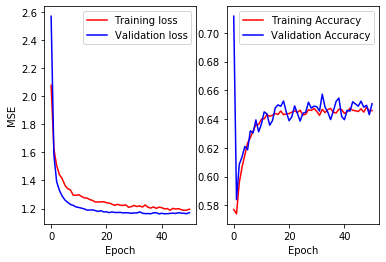

In [345]:
# Hyper-parameters
# setting hyperparameters and gettings epoch sizes
batch_size = 16
num_epochs = 51
num_samples_train = X_train.shape[0]
num_batches_train = num_samples_train // batch_size
num_samples_valid = X_valid.shape[0]
num_batches_valid = num_samples_valid // batch_size

# Define a loss function and optimizer for this problem
criterion = torch.nn.MSELoss(size_average=None, reduce=None, reduction='mean')
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-3)

def accuracy(ys, ts):
    predictions = torch.round(ys)
    correct_prediction = torch.eq(predictions,ts)
    return torch.mean(correct_prediction.float())

# Track loss
train_iter = []
train_loss, train_accs = [], []
valid_iter = []
valid_loss, valid_accs = [], []

# For each epoch
for i in range(num_epochs):
    
    # Track loss
    epoch_training_loss = 0
    epoch_training_accs = 0
    epoch_validation_loss = 0
    epoch_validation_accs = 0
    
    net.eval()
    for j in range(num_batches_valid):
        inputs = get_variable(torch.Tensor(X_valid[j * batch_size: (j + 1) * batch_size]))
        targets = get_variable(torch.Tensor(np.squeeze(y_valid[j * batch_size: (j + 1) * batch_size])))
        # Forward pass
        outputs = net.forward(inputs)
        # Compute loss
        loss = criterion(outputs,targets)
        # Update loss
        epoch_validation_loss += loss.cpu().detach().numpy()
        epoch_validation_accs += accuracy(outputs, targets)
    
    net.train()
    for j in range(num_batches_train):
        inputs = get_variable(torch.Tensor(X_train[j * batch_size: (j + 1) * batch_size]))
        targets = get_variable(torch.Tensor(np.squeeze(y_train[j * batch_size: (j + 1) * batch_size])))
        outputs = net.forward(inputs)
        # Compute loss
        loss = criterion(outputs,targets)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Update loss
        epoch_training_loss += loss.cpu().detach().numpy()
        epoch_training_accs += accuracy(outputs,targets)
        
    # Save loss for plot
    train_loss.append(epoch_training_loss/num_batches_train)
    train_accs.append(epoch_training_accs/num_batches_train)
    valid_loss.append(epoch_validation_loss/num_batches_valid)
    valid_accs.append(epoch_validation_accs/num_batches_valid)

    # Print loss every 5 epochs
    if i % 5 == 0:
        print(f'Epoch {i} \t train loss: {train_loss[-1]:.10f} \t valid loss: {valid_loss[-1]:.10f} \t valid acc: {valid_accs[-1]:.4f}')



# Plot training and validation loss
epoch = np.arange(len(train_loss))
plt.figure()
plt.subplot(1,2,1)
plt.plot(epoch, train_loss, 'r', label='Training loss',)
plt.plot(epoch, valid_loss, 'b', label='Validation loss')
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('MSE')

plt.subplot(1,2,2)
plt.plot(epoch, train_accs, 'r', label='Training Accuracy')
plt.plot(epoch, valid_accs, 'b', label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('')
plt.show()

In [349]:
torch.set_printoptions(sci_mode=False)
outputs

tensor([[     0.1705,      0.6052,      1.0223,  ...,      0.6055,
              1.1322,     -0.0023],
        [     0.0433,     -0.0552,     -0.0977,  ...,      0.0149,
             -0.0244,     -0.0165],
        [     0.4910,      1.2999,      1.1548,  ...,      1.0932,
              3.6941,      0.1165],
        ...,
        [    -0.0122,      0.6157,      0.5769,  ...,     -0.0457,
              0.1254,     -0.1017],
        [     0.0549,      2.1760,      2.8953,  ...,      0.9492,
              4.2164,      0.0069],
        [    -0.0855,      0.7464,      1.4362,  ...,      0.1841,
              0.9459,     -0.0737]], grad_fn=<AddmmBackward>)

In [347]:
targets

tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 2.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 2., 6.,  ..., 0., 7., 0.],
        [0., 3., 0.,  ..., 2., 0., 0.]])

In [350]:
outputs-targets

tensor([[     0.1705,      0.6052,      0.0223,  ...,      0.6055,
              1.1322,     -0.0023],
        [     0.0433,     -0.0552,     -0.0977,  ...,      0.0149,
             -0.0244,     -0.0165],
        [     0.4910,      0.2999,     -0.8452,  ...,      1.0932,
              2.6941,      0.1165],
        ...,
        [    -0.0122,      0.6157,      0.5769,  ...,     -0.0457,
              0.1254,     -0.1017],
        [     0.0549,      0.1760,     -3.1047,  ...,      0.9492,
             -2.7836,      0.0069],
        [    -0.0855,     -2.2536,      1.4362,  ...,     -1.8159,
              0.9459,     -0.0737]], grad_fn=<SubBackward0>)